## Primeros modelos KERAS sobre MNIST

Vamos a implementar las primeras redes neuronales para el conjunto de datos MNIST

IMPORTAMOS el Dataset y lo normalizamos:

In [1]:
from tensorflow import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('training set', x_train.shape)
print('test set', x_test.shape)

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize [0..255]-->[0..1]
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

2023-10-10 12:44:36.554272: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-10 12:44:36.590302: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-10 12:44:36.774964: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-10 12:44:36.774997: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-10 12:44:36.776075: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

training set (60000, 28, 28)
test set (10000, 28, 28)


## Modelos secuenciales en KERAS

Los modelos secuenciales son modelos donde las capas se van añadiendo una tras otra. Te permite crear topologías básicas sin conexiones que no sean estrictamente lineales.

La red neuronal a crear es la siguiente:

- Capa de entrada de 784 neuronas, acorde con la dimensionalidad de los datos
- Capa oculta de 512 neuronas, con función de activación ReLU
- Capa de salida de 10 neuronas, acorde con el número de clases. Al ser un problema de clasificación emplearemos la función de activación Softmax

Este sería la definición del modelo:

In [2]:
from keras import Sequential
from keras.layers import Dense, Input

model = Sequential()

model.add(Input(784))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


![model summary](summary.png)

El summary del modelo nos lista las diferentes capas del mismo así como su número de parámetros. Por ejemplo la capa densa oculta tiene 784 entradas x 512 salidas lo que implica una matriz de 784x512 = 401408 componentes. Además esta capa Dense tiene un vector de bias de 512 componentes, por lo tanto en total son 401408+512 = **401920**, que coincide con el número de parámetros de la tabla para dicha capa.

Podemos generar una imagen con la topología del modelo:

In [4]:
keras.utils.plot_model(model, to_file="model.png")

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Compilar el modelo 

Para terminar la definición de nuestro modelo debemos definir dos componentes muy importantes:

1. Función de pérdida. En nuestro caso al ser un problema de clasificación emplearemos la **categorical_crossentropy**
2. Optimizador. En nuestro caso y para empezar emplearemos un sencillo descenso por gradiente estocástico **SGD**

opcionalmente:

3. Definir una métrica asociada a la calidad del modelo. En nuestro caso sería la tasa de acierto **accuracy**


Una vez definidos pasamos a compilar el modelo:

In [5]:
from keras.optimizers import SGD

sgd=SGD(learning_rate=0.01, momentum=0.9)

# Compile Model
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])



## Entrenar el modelo

Una vez tenemos los datos cargados y normalizados, así como el modelo ya compilado, podemos realizar el entrenamiento mediante el método **fit**. Para ello previamente necesitamos definir el tamaño del batch así como el número de epochs.

Al mismo tiempo que entrenamos el modelo con los datos de entrenamiento vamos a ir evaluando dicho modelo sobre los datos de test. Además, vamos generando un **history** con la evolución del modelo para luego poder crear gráficas del mismo.

In [6]:
batch_size=32
epochs=25

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2891 - accuracy: 0.9170 - val_loss: 0.1521 - val_accuracy: 0.9553
Epoch 2/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1281 - accuracy: 0.9635 - val_loss: 0.1113 - val_accuracy: 0.9685
Epoch 3/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0899 - accuracy: 0.9738 - val_loss: 0.0890 - val_accuracy: 0.9736
Epoch 4/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0679 - accuracy: 0.9808 - val_loss: 0.0771 - val_accuracy: 0.9762
Epoch 5/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0541 - accuracy: 0.9846 - val_loss: 0.0731 - val_accuracy: 0.9778
Epoch 6/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0441 - accuracy: 0.9882 - val_loss: 0.0645 - val_accuracy: 0.9799
Epoch 7/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0356 - accuracy: 0.9905 - val_loss: 0.0640 - val_accuracy:

## Explorar el History

Realizar gráfica con resultados de accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


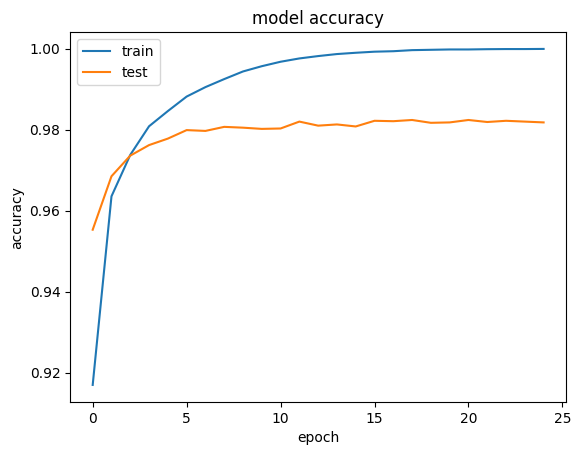

In [7]:
print(history.history.keys())

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



Realizar gráfica con resultados de loss

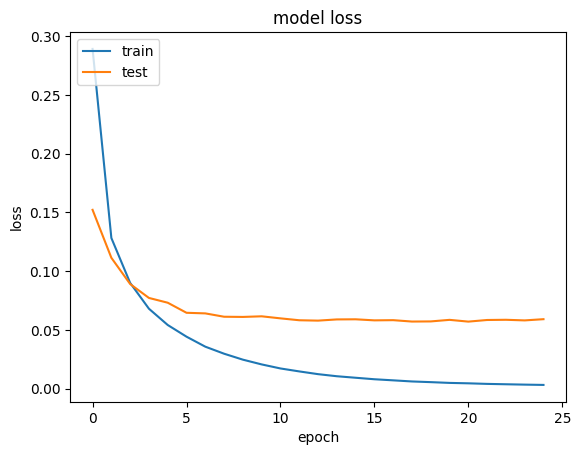

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **Ejercicio** 

probar diferentes entrenamientos dependiendo de los siguientes valores y anotar el accuracy en test alcanzado

| Dense/Batch  | 16  | 32  |  64 | 128  |
|---|---|---|---|---|
|  256  |   |   |   |   |
|  512  |   |   |   |   |
|  1024 |   |   |   |   |

# Salvar y cargar el modelo

Normalmente necesitaremos salvar el modelo entrenado para emplearlo más tarde en producción (inferencia)



In [1]:
# Cargar datos y normalizar
from tensorflow import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('training set', x_train.shape)
print('test set', x_test.shape)

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# crear modelo y entrenar
from keras import Sequential
from keras.layers import Dense, Input

model = Sequential()

dense_list = [256,512,1024]
batch_list = [16,32,64,128]

for dense in dense_list:
    for batch in batch_list:
        print(f'dense = {dense}, batch = {batch}')
        model.add(Input(784))
        model.add(Dense(dense, activation='relu'))
        model.add(Dense(num_classes, activation='softmax'))

        model.summary()

        from keras.optimizers import SGD

        sgd=SGD(learning_rate=0.01, momentum=0.9)

        model.compile(loss='categorical_crossentropy',
                    optimizer=sgd,
                    metrics=['accuracy'])

        batch_size=batch
        epochs=25

        history = model.fit(x_train, y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_data=(x_test, y_test))
        
        # guardar modelo
        model.save(f"model_{dense}_{batch}.keras")

2023-10-11 10:56:46.562865: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-11 10:56:46.596118: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-11 10:56:46.756512: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-11 10:56:46.756562: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-11 10:56:46.757741: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

training set (60000, 28, 28)
test set (10000, 28, 28)
dense = 256, batch = 16
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
3750/3750 [==============================] - 4s 1ms/step - loss: 0.2323 - accuracy: 0.9316 - val_loss: 0.1377 - val_accuracy: 0.9617
Epoch 2/25
3750/3750 [==============================] - 4s 1ms/step - loss: 0.0984 - accuracy: 0.9710 - val_loss: 0.0913 - val_accuracy: 0.9709
Epoch 3/25
3750/3750 [========================

KeyboardInterrupt: 

In [ ]:

for dense in dense_list:
    for batch in batch_list:
        print(f'dense = {dense}, batch = {batch}')
        # cargar modelo
        from keras.models import load_model
        model = load_model(f"model_{dense}_{batch}.keras")

        # evaluar modelo
        score = model.evaluate(x_test, y_test, verbose=0)
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])
        print('------------------------------------------------------------------------------------------------------------------\n')
